In [ ]:
!pip uninstall -y bert-tensorflow gast tensorflow-hub
!pip install -U tensorflow transformers

Found existing installation: gast 0.7.0
Uninstalling gast-0.7.0:
  Successfully uninstalled gast-0.7.0
Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensor

In [ ]:
from transformers import TFBertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertModel.from_pretrained("bert-base-uncased", use_safetensors=False)
inputs = tokenizer("Hello world", return_tensors="tf")
outputs = model(**inputs)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import backend as K

# Params for BERT
BERT_MODEL = "bert-base-uncased"

# Tokenizer
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

# BERT encoder
bert_model = TFBertModel.from_pretrained(BERT_MODEL, use_safetensors=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Get the GPU device name. Checking if exists
device_name = tf.test.gpu_device_name()

# device name should appear as /device:GPU:0 if present and running
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
#     raise SystemError('GPU device not found')
    print('checked')

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/dataset/train_skills.csv')
# colab path to data:
# /content/drive/My Drive/train_skills.csv
train.info()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/train_skills.csv'

In [ ]:
# Thay thế tất cả giá trị bị thiếu (NaN) trong DataFrame train bằng 0
train.fillna(0, inplace = True)
'''
Tránh lỗi khi huấn luyện mô hình (đa số mô hình ML không chấp nhận NaN).
Quy ước 0 là không có skill / nhãn mặc định.'''
# Chuyển kiểu dữ liệu của cột skill sang số nguyên 8-bit.
train.skill = train.skill.astype('int8')
'''
Tối ưu bộ nhớ (quan trọng khi dataset lớn).
Đảm bảo skill là nhãn số (label), phù hợp cho classification.
'''
# Chuyển toàn bộ văn bản trong cột phrase sang chữ thường.
train['phrase'] = train.phrase.str.lower()
# Gộp nhãn bất thường (label cleaning)
train.skill = train.skill.replace(10, 1)
'''
Trong quá trình kiểm tra các giá trị duy nhất của skill, phát hiện có giá trị 10.
'''

'\nTrong quá trình kiểm tra các giá trị duy nhất của skill, phát hiện có giá trị 10.\n'

In [ ]:
train.tail()

,phrase,skill
5695,leveraging secure,0
5696,team members,0
5697,graduate,0
5698,running,0
5699,process,0


In [ ]:
# ratio of classes; checking for balance in training data
print('Number of skill:', train.skill.sum())
print('Number of Not Skill:', len(train.skill) - train.skill.sum())
print('Ratio of classes: Skill=', train.skill.sum() / len(train.skill), ' Not Skill=', 1 - train.skill.sum() / len(train.skill))

Number of skill: 3036
Number of Not Skill: 2664
Ratio of classes: Skill= 0.5326315789473685  Not Skill= 0.46736842105263154


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data 1st iter 85/15 2nd iter 80/20
# ensuring shuffling due to the sequentual nature of the training set
X = train.phrase
y = train.skill

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y,
                                                    test_size = .2,
                                                    random_state = 42,
                                                    shuffle = True
                                                    )

print('{:>5,} training samples'.format(len(X_train)))
print('{:>5,} validation samples'.format(len(X_test)))

4,560 training samples
1,140 validation samples


In [ ]:
import numpy as np
# According to analysis the largest chunk captured by regex was 18 tokens long
max_seq_length = 18
# data should be np array with new dimension for input
train_text = X_train.to_numpy()[:, np.newaxis]
test_text = X_test.to_numpy()[:, np.newaxis]
# always should check and check again
train_text.shape, test_text.shape

((4560, 1), (1140, 1))

## **Tokenization**

In [ ]:
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label
def create_tokenizer():
    """
    Thay thế hoàn toàn tensorflow_hub + FullTokenizer
    """
    return BertTokenizer.from_pretrained("bert-base-uncased")
def convert_single_example(tokenizer, example, max_seq_length=256):

    tokens_a = tokenizer.tokenize(example.text_a)

    # account for [CLS] and [SEP]
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[: max_seq_length - 2]

    tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    segment_ids = [0] * len(tokens)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_mask = [1] * len(input_ids)

    # padding
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label
def convert_examples_to_features(tokenizer, examples, max_seq_length=256):

    input_ids, input_masks, segment_ids, labels = [], [], [], []

    for example in tqdm(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)

    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )
def convert_text_to_examples(texts, labels):

    examples = []
    for text, label in zip(texts, labels):
        # Ensure text_a is a plain string. If 'text' is a numpy array like ['phrase'], extract the string.
        text_a_content = text[0] if isinstance(text, np.ndarray) and text.ndim == 1 else text
        examples.append(
            InputExample(
                guid=None,
                text_a=text_a_content,
                text_b=None,
                label=label,
            )
        )
    return examples

In [ ]:
# Instantiate tokenizer
tokenizer = create_tokenizer()

# Convert data to InputExample format
train_examples = convert_text_to_examples(train_text, y_train)
test_examples = convert_text_to_examples(test_text, y_test)

# Convert to features
train_input_ids, train_input_masks, train_segment_ids, train_labels = (
    convert_examples_to_features(tokenizer, train_examples, max_seq_length)
)

test_input_ids, test_input_masks, test_segment_ids, test_labels = (
    convert_examples_to_features(tokenizer, test_examples, max_seq_length)
)


Converting examples to features: 100%|██████████| 1140/1140 [00:00<00:00, 13737.55it/s]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Chuyển train_labels về 1D nếu đang là 2D
y_train = np.array(train_labels).reshape(-1)

classes = np.unique(y_train)

# Tính class weights
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes.tolist(), weights.tolist()))

## **Embedding**

In [ ]:
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name="bert-base-uncased", **kwargs):
        super().__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(model_name, use_safetensors=False)

    def call(self, inputs, training=None):
        input_ids, attention_mask, token_type_ids = inputs

        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            training=training # Pass the training argument
        )
        return outputs.last_hidden_state # Return last_hidden_state for custom pooling in build_model

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train = np.array(train_labels).reshape(-1) # Flatten y_train to a 1D array
classes = np.unique(y_train)
weights = compute_class_weight("balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes.tolist(), weights.tolist())) # Convert classes and weights to lists for dict creation

## **Network Archetecture**

In [ ]:
import tensorflow as tf
# from transformers import AdamWeightDecay # Remove this import
from tensorflow.keras.layers import GlobalAveragePooling1D, Lambda, Concatenate, Dropout, Dense # Import necessary Keras layers

def build_model(seq_length):
    # Tạo input
    input_ids = tf.keras.Input(shape=(seq_length,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(seq_length,), dtype=tf.int32, name="attention_mask")
    token_type_ids = tf.keras.Input(shape=(seq_length,), dtype=tf.int32, name="token_type_ids")

    # Instantiate BertLayer
    bert_layer = BertLayer(model_name=BERT_MODEL)

    # Lấy embedding từ BERT qua BertLayer
    emb = bert_layer([input_ids, attention_mask, token_type_ids])

    # Mean pooling using Keras layer
    mean_pooled = GlobalAveragePooling1D()(emb) # Replaced tf.reduce_mean

    # Lấy CLS token using Keras Lambda layer
    cls = Lambda(lambda x: x[:, 0, :])(emb) # Replaced direct slicing

    # Gộp CLS + Mean pooling using Keras layer
    combined = Concatenate(axis=1)([cls, mean_pooled]) # Replaced tf.concat

    # Classification head
    x = Dropout(0.4)(combined)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation="sigmoid")(x)

    # Build model
    model = tf.keras.Model(inputs=[input_ids, attention_mask, token_type_ids], outputs=output)

    # Use tf.keras.optimizers.AdamW instead of AdamWeightDecay from transformers
    optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-5)
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[tf.keras.metrics.AUC(name="auc"), "accuracy"]
    )

    model.summary()
    return model

## **Training**

In [ ]:
# TensorFlow 2.x does not require explicit session initialization for eager execution.
# This function is no longer needed.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from transformers import AdamWeightDecay

# Instantiate and compile model using the corrected build_model function
# bert_model is defined in -fSBPhu5n1WN, max_seq_length in xiqX0BgxsxB7
model = build_model(max_seq_length) # Removed bert_model from arguments

# Early stopping
early_stop = EarlyStopping(
    monitor="val_auc",
    patience=2,
    mode="max",
    restore_best_weights=True
)

# Train model
model.fit(
    x=[train_input_ids, train_input_masks, train_segment_ids], # Add train_segment_ids
    y=train_labels,
    validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels), # Add test_segment_ids
    epochs=10,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_type_ids      │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_4        │ (None, 18, 768)   │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
│                     │                   │            │ token_type_ids[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 768)       │          0 │ bert_layer_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 768)       │          0 │ bert_layer_4[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 1536)      │          0 │ lambda_3[0][0],   │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 1536)      │          0 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │     98,368 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 98,433 (384.50 KB)

 Trainable params: 98,433 (384.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.5493 - auc: 0.5805 - loss: 0.7114 - val_accuracy: 0.7272 - val_auc: 0.8223 - val_loss: 0.5395
Epoch 2/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6681 - auc: 0.7344 - loss: 0.6000 - val_accuracy: 0.7719 - val_auc: 0.8574 - val_loss: 0.4779
Epoch 3/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7326 - auc: 0.8068 - loss: 0.5320 - val_accuracy: 0.7947 - val_auc: 0.8737 - val_loss: 0.4452
Epoch 4/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7405 - auc: 0.8214 - loss: 0.5112 - val_accuracy: 0.8061 - val_auc: 0.8841 - val_loss: 0.4245
Epoch 5/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7672 - auc: 0.8453 - loss: 0.4822 - val_accuracy: 0.8044 - val_auc: 0.8889 - val_loss: 0.4120
Epoch 6/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7638 - auc: 0.8493 - loss: 0.4734 - val_accuracy: 0.8088 - val_auc: 0.8922 - val_loss: 0.4098
Epoch 7/10
285/285 ━━━━━━━━━━━━━━

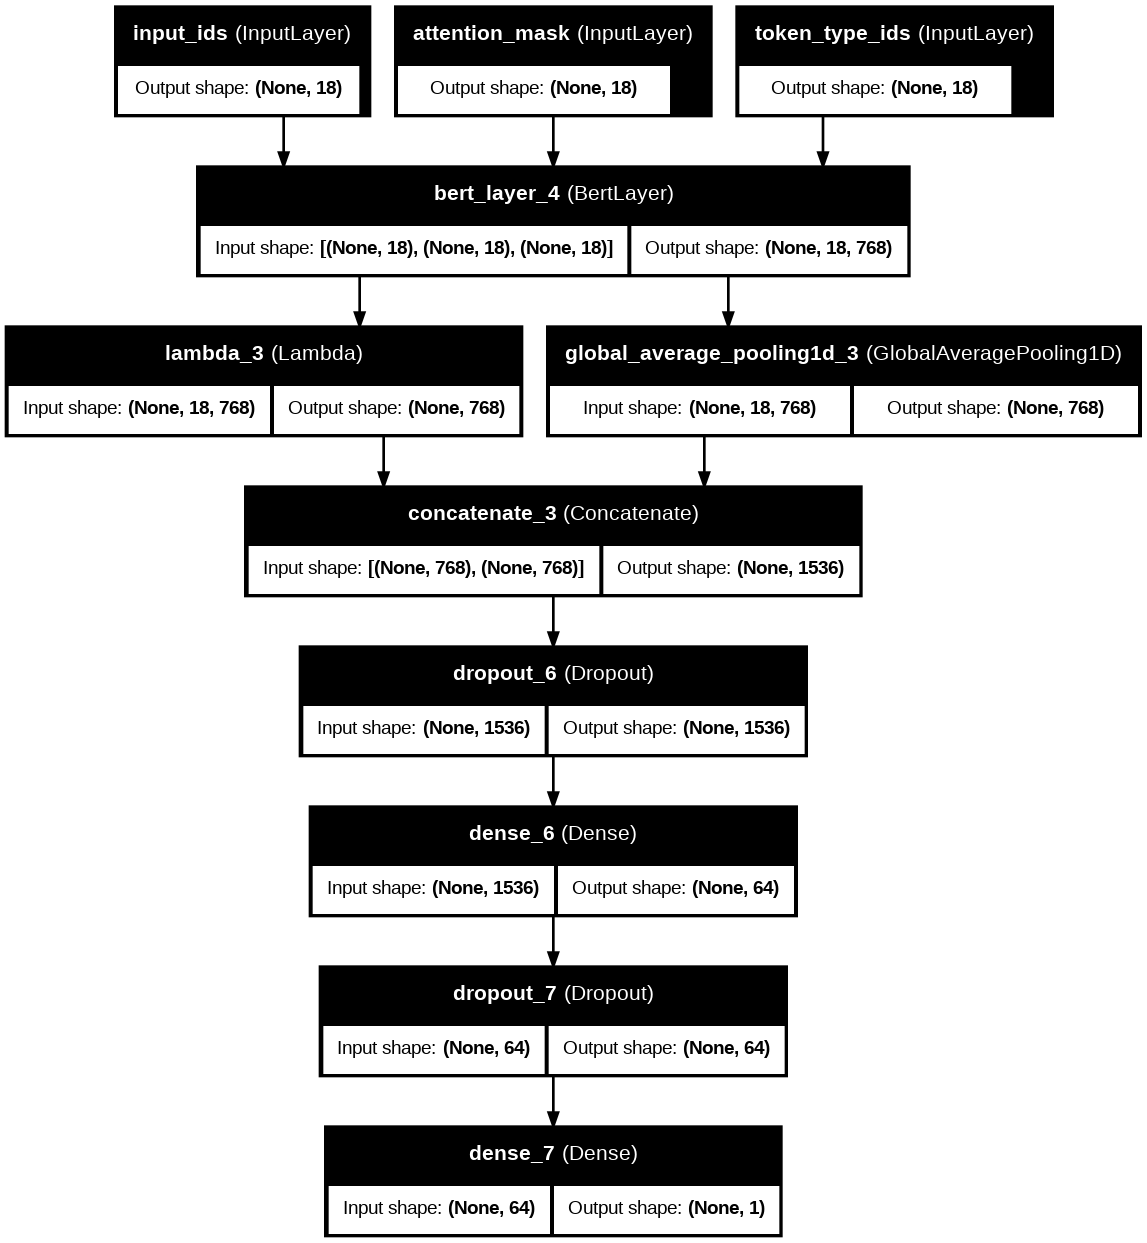

In [ ]:
# after many interations to find an optimal structure this is the result
# I should consider inputting size for easier saving and loading
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)

In [ ]:
# found it was necessary to make a directory on colab while saving the model for easier retrieval
model.save('bert_skills_clf.h5', overwrite=True, include_optimizer=True)
# predictions before we clear and reload model
pre_save_preds = model.predict([test_input_ids,
                                test_input_masks,
                                test_segment_ids]
                              )
# # # Clear and load model
model = None
model = build_model(max_seq_length)
# initialize_vars(sess) # Removed: not needed in TF2.x
model.load_weights('bert_skills_clf.h5')

# # predictions after we clear and reload model
post_save_preds = model.predict([test_input_ids,
                                test_input_masks,
                                test_segment_ids]
                              )
# Are they the same?
all(pre_save_preds == post_save_preds)

36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_type_ids      │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_5        │ (None, 18, 768)   │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
│                     │                   │            │ token_type_ids[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 768)       │          0 │ bert_layer_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 768)       │          0 │ bert_layer_5[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 1536)      │          0 │ lambda_4[0][0],   │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 1536)      │          0 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │     98,368 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         65 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 98,433 (384.50 KB)

 Trainable params: 98,433 (384.50 KB)

 Non-trainable params: 0 (0.00 B)

36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step


True

## **Evaluation**

=== Đánh giá trên tập Test (Validation) ===
Test Loss: 0.3885
Test Accuracy: 0.9015

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
=== Các chỉ số đánh giá chi tiết ===
Accuracy       : 0.8228
Precision      : 0.8722
Recall (Sensitivity) : 0.7798
F1-Score       : 0.8234
Specificity    : 0.8713
ROC-AUC        : 0.9016

=== Classification Report ===
              precision    recall  f1-score   support

   Not Skill       0.78      0.87      0.82       536
       Skill       0.87      0.78      0.82       604

    accuracy                           0.82      1140
   macro avg       0.83      0.83      0.82      1140
weighted avg       0.83      0.82      0.82      1140


=== Confusion Matrix ===
[[TN, FP]
 [FN, TP]]
[[467  69]
 [133 471]]


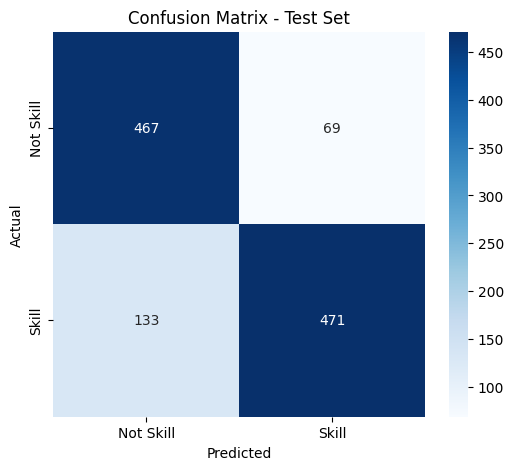

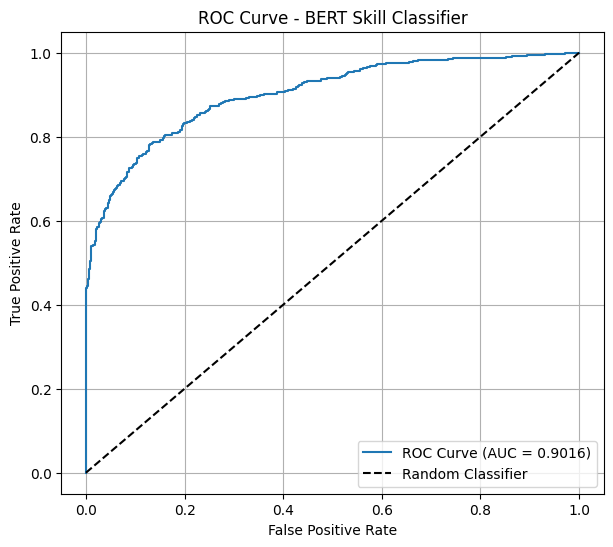

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, accuracy_score
)

# 1. Đánh giá Loss và Accuracy cơ bản (giữ nguyên như cũ)
print("=== Đánh giá trên tập Test (Validation) ===")
accr = model.evaluate([test_input_ids, test_input_masks, test_segment_ids], y_test, verbose=0)
print(f'Test Loss: {accr[0]:.4f}')
print(f'Test Accuracy: {accr[1]:.4f}\n')

# 2. Dự đoán xác suất và nhãn trên tập test
y_pred_prob = model.predict([test_input_ids, test_input_masks, test_segment_ids])
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Ngưỡng 0.5
y_true = y_test.values.flatten()

# 3. Các chỉ số đánh giá chi tiết
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
specificity = recall_score(y_true, y_pred, pos_label=0)  # Specificity = TN / (TN + FP)
auc = roc_auc_score(y_true, y_pred_prob)

print("=== Các chỉ số đánh giá chi tiết ===")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall (Sensitivity) : {recall:.4f}")
print(f"F1-Score       : {f1:.4f}")
print(f"Specificity    : {specificity:.4f}")
print(f"ROC-AUC        : {auc:.4f}\n")

# 4. Classification Report đầy đủ
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=['Not Skill', 'Skill']))

# 5. Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_true, y_pred)

print("\n=== Confusion Matrix ===")
print("[[TN, FP]")
print(" [FN, TP]]")
print(cm)

# 6. Vẽ Heatmap Confusion Matrix (đẹp và dễ đọc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Skill', 'Skill'],
            yticklabels=['Not Skill', 'Skill'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. (Tùy chọn) Vẽ đường cong ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BERT Skill Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Test on (assuming) unseen data
unseen = np.array([
                   'mongodb',
                   'statistics , mathematics , biostatistics',
                   'experience in python',
                   'language e.g',
                   'this is fucking bullshit',
                   'the definition',
                   'hard-worker',
                   'san francisco bay area' ,
                   'many things',
                   'passion for data',
                   ])
unseen_text = unseen[:, np.newaxis]

# Instantiate tokenizer
tokenizer = create_tokenizer()

# Convert data to InputExample format
unseen_examples = convert_text_to_examples(unseen_text, np.zeros((len(unseen_text),1)))

# Convert to features
(unseen_input_ids, unseen_input_masks, unseen_segment_ids, unseen_labels
) = convert_examples_to_features(tokenizer,
                                 unseen_examples,
                                 max_seq_length=max_seq_length)

Converting examples to features: 100%|██████████| 10/10 [00:00<00:00, 4191.79it/s]


In [ ]:
unseen_truth = np.array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1]).reshape(-1, 1)
accr = model.evaluate([unseen_input_ids,
                       unseen_input_masks,
                       unseen_segment_ids],
                       unseen_truth)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5000 - loss: 0.7899
Test set
  Loss: 0.790
  Accuracy: 0.500
